EDA And Feature Engineering Flight Price Prediction
check the dataset info below https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\rampe\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
## basic of the info datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
df.shape

(10683, 11)

In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
## feature engineering process
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
'''# is using the pandas Series str accessor to split the strings in the Date_of_Journey column of the pandas DataFrame df on the delimiter /.
#This will return a pandas Series of lists, where each list contains the parts of the original string that were separated by the / character.
#The .str[0] at the end of the line of code then selects the first element of each list in the Series, which corresponds to the day value of the date. This value is then assigned to a new column in the DataFrame called Date.
#For example, if the value in the Date_of_Journey column is '06/05/2019', the str.split('/') function will split this string into a list ['06', '05', '2019']. The .str[0] function will then select the first element of this list, which is '06', and assign it to the Date column in the DataFrame.
#In summary, the line of code is extracting the day value from the Date_of_Journey column and storing it in a new column called Date.
'''

"# is using the pandas Series str accessor to split the strings in the Date_of_Journey column of the pandas DataFrame df on the delimiter /.\n#This will return a pandas Series of lists, where each list contains the parts of the original string that were separated by the / character.\n#The .str[0] at the end of the line of code then selects the first element of each list in the Series, which corresponds to the day value of the date. This value is then assigned to a new column in the DataFrame called Date.\n#For example, if the value in the Date_of_Journey column is '06/05/2019', the str.split('/') function will split this string into a list ['06', '05', '2019']. The .str[0] function will then select the first element of this list, which is '06', and assign it to the Date column in the DataFrame.\n#In summary, the line of code is extracting the day value from the Date_of_Journey column and storing it in a new column called Date.\n"

In [11]:
df['Date']

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date, Length: 10683, dtype: object

In [12]:
df['month']=df['Date_of_Journey'].str.split('/').str[1]
'''Here, the str.split('/') function splits each string in the Date_of_Journey column into a list of strings using the / character as a separator. The .str[1] function then selects the second element of each list in the resulting Series, which corresponds to the month value of the date.

For example, if the value in the Date_of_Journey column is '06/05/2019', the str.split('/') function will split this string into a list ['06', '05', '2019']. The .str[1] function will then select the second element of this list, which is '05', and assign it to the month column in the DataFrame.

In summary, this line of code is extracting the month value from the Date_of_Journey column and storing it in a new column called month.'''

"Here, the str.split('/') function splits each string in the Date_of_Journey column into a list of strings using the / character as a separator. The .str[1] function then selects the second element of each list in the resulting Series, which corresponds to the month value of the date.\n\nFor example, if the value in the Date_of_Journey column is '06/05/2019', the str.split('/') function will split this string into a list ['06', '05', '2019']. The .str[1] function will then select the second element of this list, which is '05', and assign it to the month column in the DataFrame.\n\nIn summary, this line of code is extracting the month value from the Date_of_Journey column and storing it in a new column called month."

In [13]:
df['month']

0        03
1        05
2        06
3        05
4        03
         ..
10678    04
10679    04
10680    04
10681    03
10682    05
Name: month, Length: 10683, dtype: object

In [14]:
df['year']=df['Date_of_Journey'].str.split('/').str[2]


In [15]:
df['year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: year, Length: 10683, dtype: object

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  month            10683 non-null  object
 13  year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [18]:
## convert an object to int 
df['Date']=df['Date'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  month            10683 non-null  int32 
 13  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [20]:
## drop date_of_journey
df.drop('Date_of_Journey',axis=1,inplace=True)

In [21]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Date', 'month',
       'year'],
      dtype='object')

In [22]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [23]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])
#The lambda function takes one argument x, which represents each element of the DataFrame or Series, and applies the split method on it with a space character as a delimiter. The resulting list is then indexed with [0] to extract the first element of the list, which corresponds to the date part of the string.

In [24]:
df['Arrival_Time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10678    22:25
10679    23:20
10680    11:20
10681    14:10
10682    19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [25]:
df['arr_hour']=df['Arrival_Time'].str.split(':').str[0]
df['arr_mintes']=df['Arrival_Time'].str.split(':').str[1]

In [26]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year,arr_hour,arr_mintes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [27]:
df['arr_hour']=df['arr_hour'].astype(int)
df['arr_mintes']=df['arr_mintes'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  month            10683 non-null  int32 
 12  year             10683 non-null  int32 
 13  arr_hour         10683 non-null  int32 
 14  arr_mintes       10683 non-null  int32 
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [29]:
# drop arrival_time column
df.drop('Arrival_Time',axis=1,inplace=True)

In [30]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year,arr_hour,arr_mintes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [31]:
df['dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['dept_mintes']=df['Dep_Time'].str.split(':').str[1]

In [32]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,month,year,arr_hour,arr_mintes,dept_hour,dept_mintes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  month            10683 non-null  int32 
 11  year             10683 non-null  int32 
 12  arr_hour         10683 non-null  int32 
 13  arr_mintes       10683 non-null  int32 
 14  dept_hour        10683 non-null  object
 15  dept_mintes      10683 non-null  object
dtypes: int32(5), int64(1), object(10)
memory usage: 1.1+ MB


In [34]:
df['dept_hour']=df['dept_hour'].astype(int)
df['dept_mintes']=df['dept_mintes'].astype(int)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  month            10683 non-null  int32 
 11  year             10683 non-null  int32 
 12  arr_hour         10683 non-null  int32 
 13  arr_mintes       10683 non-null  int32 
 14  dept_hour        10683 non-null  int32 
 15  dept_mintes      10683 non-null  int32 
dtypes: int32(7), int64(1), object(8)
memory usage: 1.0+ MB


In [36]:
## drop dep_time column
df.drop('Dep_Time',axis=1,inplace=True)


In [37]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'month', 'year', 'arr_hour',
       'arr_mintes', 'dept_hour', 'dept_mintes'],
      dtype='object')

In [38]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,arr_hour,arr_mintes,dept_hour,dept_mintes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [39]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [40]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [41]:
df['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [42]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [43]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,arr_hour,arr_mintes,dept_hour,dept_mintes


In [44]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,month,year,arr_hour,arr_mintes,dept_hour,dept_mintes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [45]:
df.drop('Route',axis=1,inplace=True)

In [46]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,month,year,arr_hour,arr_mintes,dept_hour,dept_mintes
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [47]:
df['Duration'].str.split(' ').str[0]

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Duration, Length: 10683, dtype: object

In [76]:
#df['Duration_houres']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [103]:
#df['Duration_houres']=df['Duration_houres'].astype(int)

In [104]:
#df['Duration_houres'].astype(int)

In [105]:
#df['Duration'].str.split(' ').str[1].str.split('h').str[0]

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10683 non-null  int64 
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Date             10683 non-null  int32 
 8   month            10683 non-null  int32 
 9   year             10683 non-null  int32 
 10  arr_hour         10683 non-null  int32 
 11  arr_mintes       10683 non-null  int32 
 12  dept_hour        10683 non-null  int32 
 13  dept_mintes      10683 non-null  int32 
 14  Duration_houres  10683 non-null  object
 15  Duration_mintes  9651 non-null   object
dtypes: int32(7), int64(2), object(7)
memory usage: 1.0+ MB


In [107]:
#df['Duration_mintes']=df['Duration'].str.split(' ').str[1].str.replace('m', '')

In [108]:
#df['Duration_mintes']

In [109]:
#df[df['Duration_mintes'].isnull()]

In [111]:
#df['Duration_mintes'].mode()

In [112]:
#df['Duration_mintes'] = df['Duration_mintes'].replace('NaN', '0m')

In [113]:
#df['Duration_mintes']

In [118]:
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [119]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10683 non-null  int64 
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Date             10683 non-null  int32 
 8   month            10683 non-null  int32 
 9   year             10683 non-null  int32 
 10  arr_hour         10683 non-null  int32 
 11  arr_mintes       10683 non-null  int32 
 12  dept_hour        10683 non-null  int32 
 13  dept_mintes      10683 non-null  int32 
 14  Duration_houres  10683 non-null  object
 15  Duration_mintes  9651 non-null   object
 16  Duration_hours   10683 non-null  int64 
 17  Duration_mins    10683 non-null

In [121]:
df.drop(["Duration"], axis = 1, inplace = True)

In [122]:
df.drop(["Duration_houres"], axis = 1, inplace = True)

In [123]:
df.drop(["Duration_mintes"], axis = 1, inplace = True)

In [124]:
df.head(5)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,month,year,arr_hour,arr_mintes,dept_hour,dept_mintes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Total_Stops      10683 non-null  int64 
 4   Additional_Info  10683 non-null  object
 5   Price            10683 non-null  int64 
 6   Date             10683 non-null  int32 
 7   month            10683 non-null  int32 
 8   year             10683 non-null  int32 
 9   arr_hour         10683 non-null  int32 
 10  arr_mintes       10683 non-null  int32 
 11  dept_hour        10683 non-null  int32 
 12  dept_mintes      10683 non-null  int32 
 13  Duration_hours   10683 non-null  int64 
 14  Duration_mins    10683 non-null  int64 
dtypes: int32(7), int64(4), object(4)
memory usage: 959.9+ KB


In [50]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [128]:
Airline = df[["Airline"]]  # select the "Airline" column and create a new dataframe
Airline = pd.get_dummies(Airline, drop_first=True)  # create dummy variables and drop the first column
Airline.head(5)  # print the first five rows of the resulting dataframe

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [51]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [130]:
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [131]:
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [54]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [134]:
df.drop(["Additional_Info"], axis = 1, inplace = True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10683 non-null  object
 1   Source          10683 non-null  object
 2   Destination     10683 non-null  object
 3   Total_Stops     10683 non-null  int64 
 4   Price           10683 non-null  int64 
 5   Date            10683 non-null  int32 
 6   month           10683 non-null  int32 
 7   year            10683 non-null  int32 
 8   arr_hour        10683 non-null  int32 
 9   arr_mintes      10683 non-null  int32 
 10  dept_hour       10683 non-null  int32 
 11  dept_mintes     10683 non-null  int32 
 12  Duration_hours  10683 non-null  int64 
 13  Duration_mins   10683 non-null  int64 
dtypes: int32(7), int64(4), object(3)
memory usage: 876.5+ KB


In [136]:
df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [137]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Date,month,year,arr_hour,arr_mintes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,13,15,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,4,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,23,30,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,21,35,...,0,0,0,0,0,0,0,0,0,1


In [139]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10683 non-null  int64
 1   Price                                      10683 non-null  int64
 2   Date                                       10683 non-null  int32
 3   month                                      10683 non-null  int32
 4   year                                       10683 non-null  int32
 5   arr_hour                                   10683 non-null  int32
 6   arr_mintes                                 10683 non-null  int32
 7   dept_hour                                  10683 non-null  int32
 8   dept_mintes                                10683 non-null  int32
 9   Duration_hours                             10683 non-null  int64
 10  Duration_mins                              106

In [141]:
df.shape

(10683, 31)

In [157]:
test_data=pd.read_excel('Test_set.xlsx')

In [158]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [159]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [161]:
df.shape

(10683, 31)

In [162]:
df.columns

Index(['Total_Stops', 'Price', 'Date', 'month', 'year', 'arr_hour',
       'arr_mintes', 'dept_hour', 'dept_mintes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [165]:
df

,Total_Stops,Price,Date,month,year,arr_hour,arr_mintes,dept_hour,dept_mintes,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,2019,22,25,19,55,2,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,2019,23,20,20,45,2,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,2019,11,20,8,20,3,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,2019,14,10,11,30,2,...,0,0,0,0,0,0,0,0,0,1


In [166]:
X = df.loc[:,['Total_Stops', 'Price', 'Date', 'month', 'year', 'arr_hour',
       'arr_mintes', 'dept_hour', 'dept_mintes', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [167]:
X.head()

,Total_Stops,Price,Date,month,year,arr_hour,arr_mintes,dept_hour,dept_mintes,Duration_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2019,1,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,2019,13,15,5,50,7,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,2019,4,25,9,25,19,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,2019,23,30,18,5,5,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,2019,21,35,16,50,4,...,0,0,0,0,0,0,0,0,0,1


In [175]:
df.drop(["year"],axis=1,inplace=True)

In [176]:
y=df.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

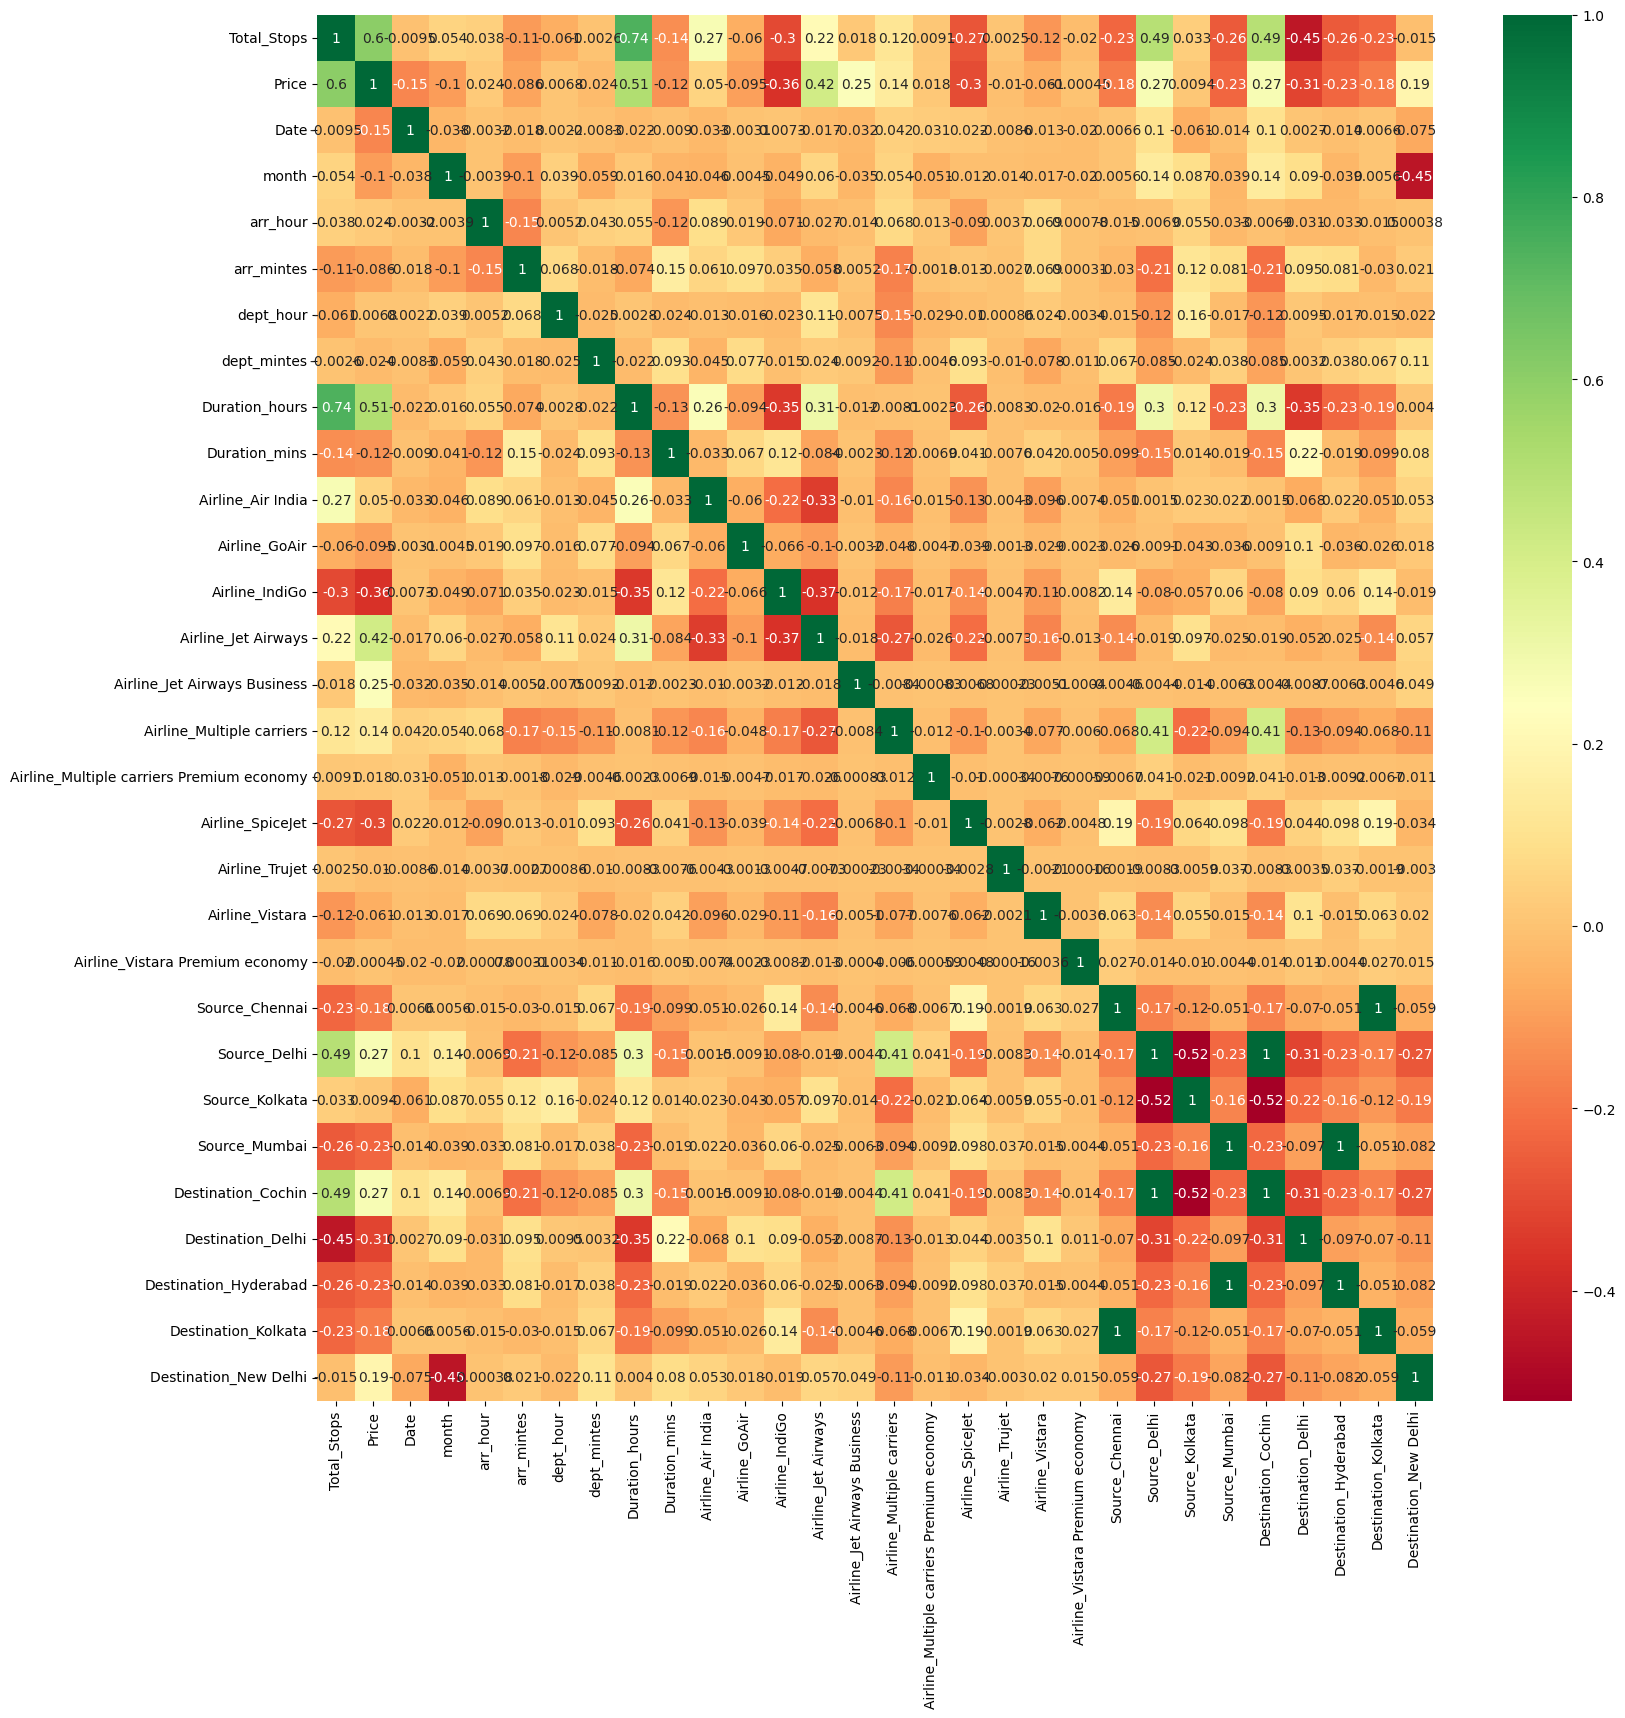

In [177]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [179]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [180]:
print(selection.feature_importances_)

[1.56142183e-01 6.27233920e-01 2.43333345e-03 1.82285036e-03
 0.00000000e+00 2.29026155e-04 1.44505179e-04 2.14104448e-04
 1.72044916e-04 7.91331586e-02 3.77800082e-04 1.90036159e-03
 6.11074448e-06 5.25562213e-03 7.44883237e-02 2.74297010e-02
 2.22348436e-03 3.15466262e-08 2.88287672e-04 2.23805054e-08
 4.62256050e-04 1.94040200e-07 3.60420856e-05 5.08305398e-03
 3.24767428e-04 8.12114138e-04 2.52201027e-03 4.63752084e-03
 1.87311087e-03 1.66223374e-05 4.73743629e-03]


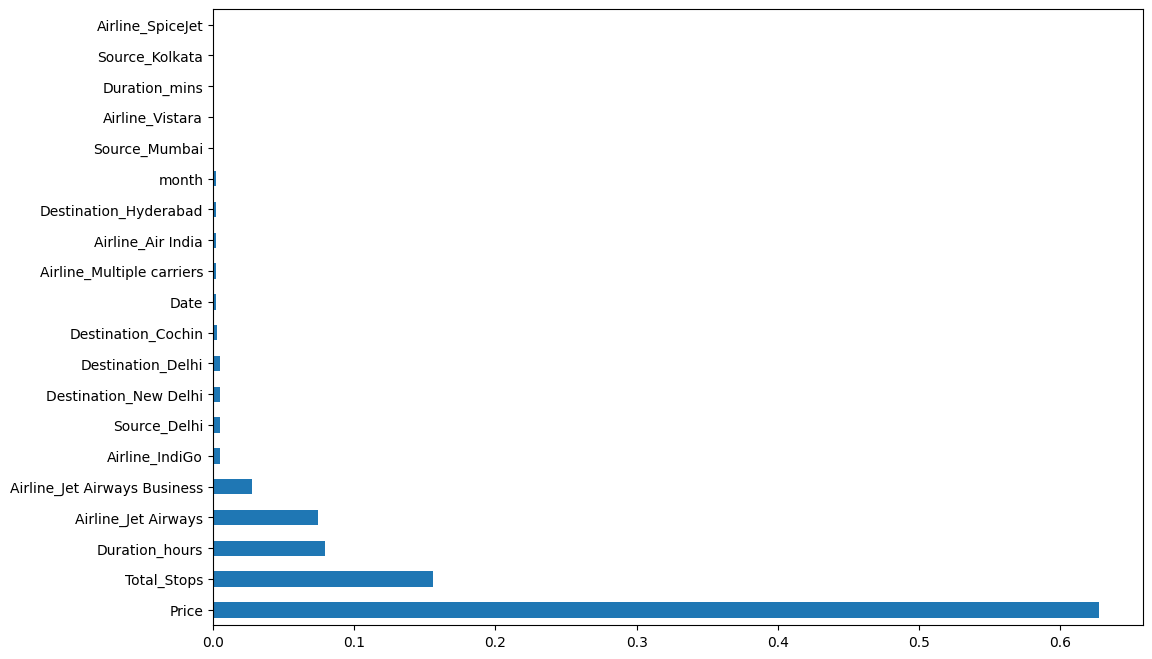

In [181]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [182]:
## Random forest
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [183]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [184]:
y_pred = reg_rf.predict(X_test)

In [185]:
reg_rf.score(X_train, y_train)

0.999481291186444

In [186]:
reg_rf.score(X_test, y_test)

0.9998844177802109

C:\Users\rampe\AppData\Local\Temp\ipykernel_18096\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


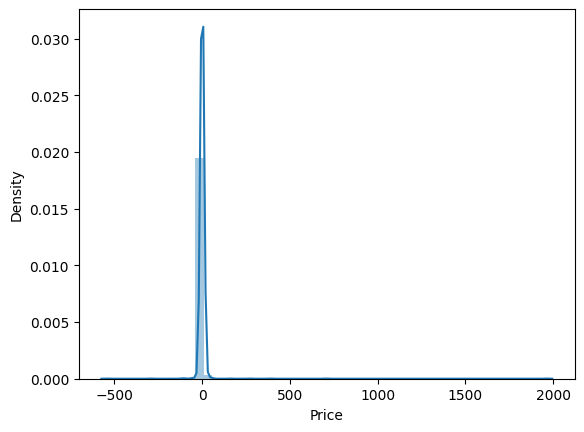

In [189]:
sns.distplot(y_test-y_pred)
plt.show()

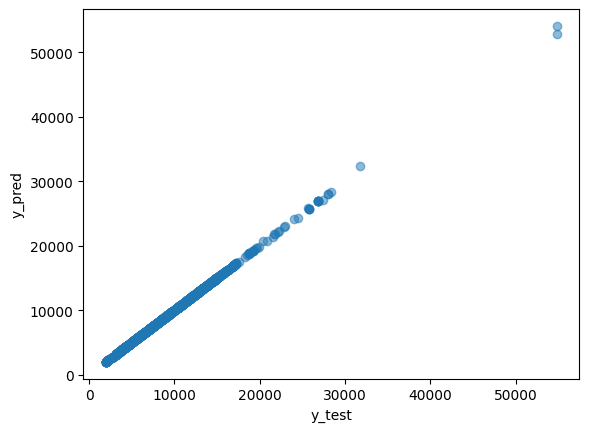

In [190]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [191]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 3.4560505381375988
MSE: 2370.280401216657
RMSE: 48.6855255822165


In [192]:
metrics.r2_score(y_test, y_pred)

0.9998844177802109

In [196]:
df

,Total_Stops,Price,Date,month,arr_hour,arr_mintes,dept_hour,dept_mintes,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,1,10,22,20,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,13,15,5,50,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,4,25,9,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,23,30,18,5,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,21,35,16,50,4,45,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,22,25,19,55,2,30,...,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,23,20,20,45,2,35,...,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,11,20,8,20,3,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,14,10,11,30,2,40,...,0,0,0,0,0,0,0,0,0,1


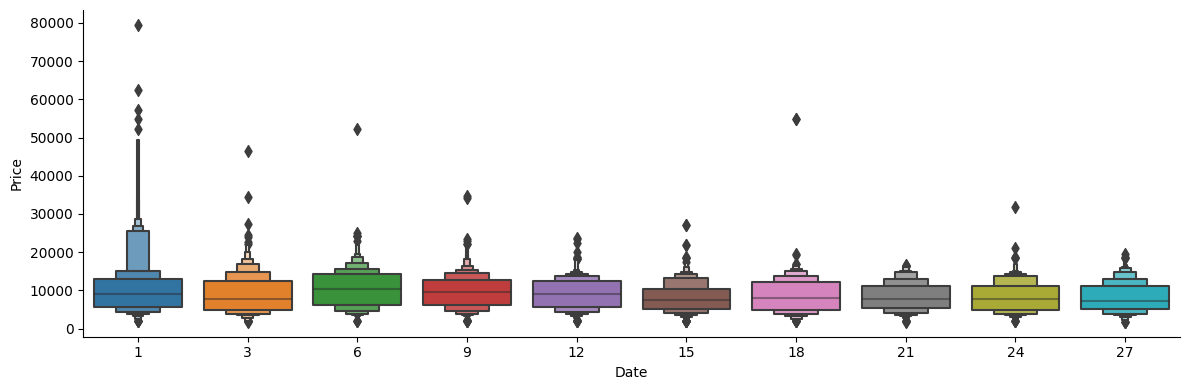

In [197]:
sns.catplot(y = "Price", x = "Date", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

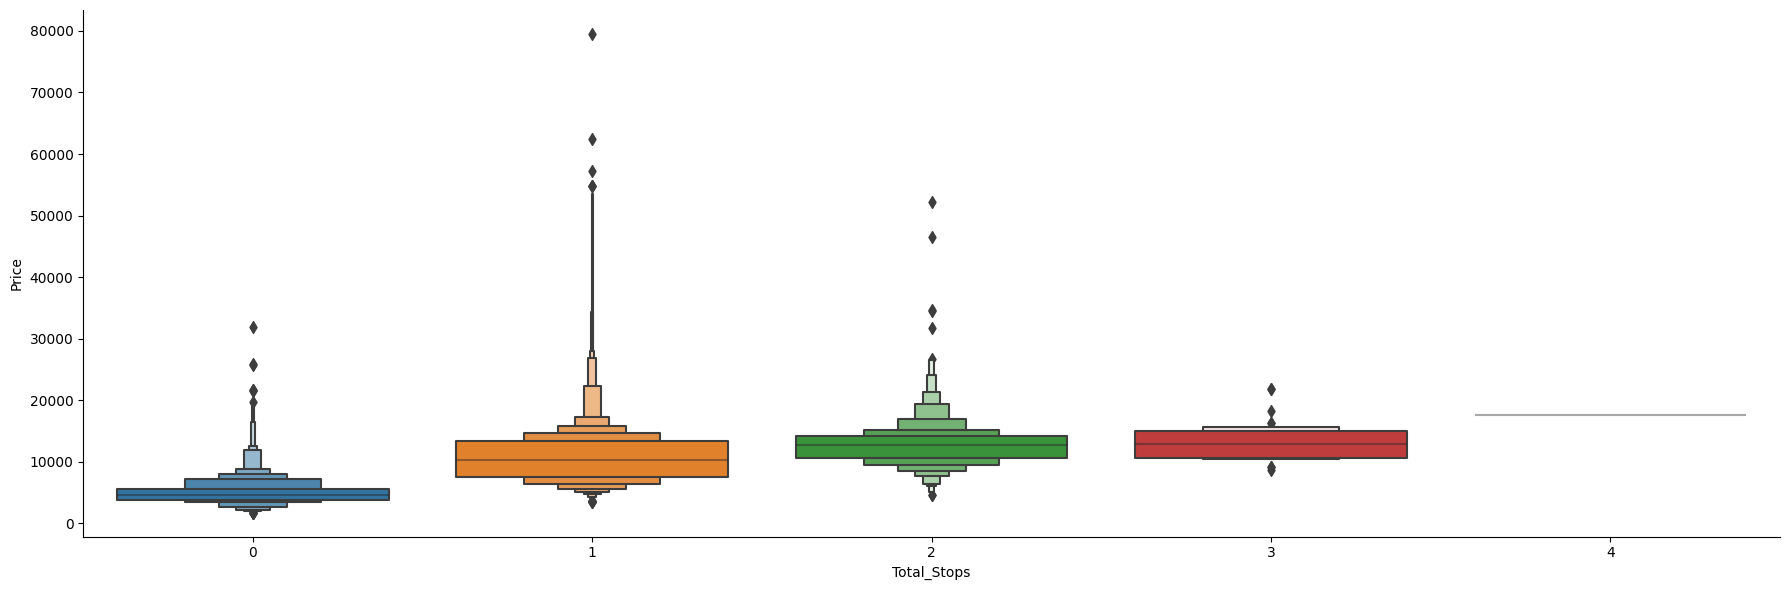

In [199]:
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()